# Part B – Predictive Modelling

# MODEL ONE: Linear Regression

## 1. Importing and Understanding the Dataset

In [48]:
# Import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [49]:
# Load the zomato_df_final_data.csv dataset
zomato_df = pd.read_csv('../data/zomato_df_final_data.csv')

In [50]:
# Gives an overview of the dataset (data types, non-null counts)
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        10500 non-null  object 
 1   cost           10154 non-null  float64
 2   cuisine        10500 non-null  object 
 3   lat            10308 non-null  float64
 4   link           10500 non-null  object 
 5   lng            10308 non-null  float64
 6   phone          10500 non-null  object 
 7   rating_number  7184 non-null   float64
 8   rating_text    7184 non-null   object 
 9   subzone        10500 non-null  object 
 10  title          10500 non-null  object 
 11  type           10452 non-null  object 
 12  votes          7184 non-null   float64
 13  groupon        10500 non-null  bool   
 14  color          10500 non-null  object 
 15  cost_2         10154 non-null  float64
 16  cuisine_color  10500 non-null  object 
dtypes: bool(1), float64(6), object(10)
memory usage: 1

In [51]:
# Provides summary statistics for numeric features
zomato_df.describe()

,cost,lat,lng,rating_number,votes,cost_2
count,10154.000000,10308.000000,10308.000000,7184.000000,7184.000000,10154.000000
mean,51.153240,-32.921377,148.067359,3.283672,83.581013,5.332974
std,27.799485,8.263449,26.695402,0.454580,175.117966,2.147115
min,8.000000,-37.858473,-123.270371,1.800000,4.000000,2.000000
25%,30.000000,-33.899094,151.061061,3.000000,12.000000,3.699187
50%,45.000000,-33.872741,151.172468,3.300000,32.000000,4.857724
75%,60.000000,-33.813451,151.208940,3.600000,87.000000,6.016260
max,500.000000,51.500986,152.869052,4.900000,3236.000000,40.000000


In [52]:
# Get the shape of the dataset
print(f"Dataset Shape: {zomato_df.shape}")

# Inspect the first three rows of the dataset
print("Dataset Head:")
zomato_df.head(2)

Dataset Shape: (10500, 17)
Dataset Head:


,address,cost,cuisine,lat,link,lng,phone,rating_number,rating_text,subzone,title,type,votes,groupon,color,cost_2,cuisine_color
0,"371A Pitt Street, CBD, Sydney",50.0,"['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']",-33.876059,https://www.zomato.com/sydney/sydney-madang-cbd,151.207605,02 8318 0406,4.0,Very Good,CBD,Sydney Madang,['Casual Dining'],1311.0,False,#e15307,5.243902,#6f706b
1,"Shop 7A, 2 Huntley Street, Alexandria, Sydney",80.0,"['Cafe', 'Coffee and Tea', 'Salad', 'Poké']",-33.910999,https://www.zomato.com/sydney/the-grounds-of-a...,151.193793,02 9699 2225,4.6,Excellent,"The Grounds of Alexandria, Alexandria",The Grounds of Alexandria Cafe,['Café'],3236.0,False,#9c3203,7.560976,#6f706b


In [53]:
# Select numeric columns from the DataFrame using data types int64 and float64.
# This extracts all columns that represent numeric features for analysis.
numeric_features = zomato_df.select_dtypes(include=['int64', 'float64'])
print(f"Numeric ({len(numeric_features.columns)}):", numeric_features.columns)  # Print the number and names of numeric columns

# Select categorical columns from the DataFrame using data types object and category.
# This extracts all columns that represent categorical features for analysis.
categorical_features = zomato_df.select_dtypes(include=['object', 'category'])
print(f"Categorical ({len(categorical_features.columns)}):", categorical_features.columns)  # Print the number and names of categorical columns

# Select boolean columns from the DataFrame using the data type bool.
# This extracts any columns that represent boolean features (True/False values).
boolean_features = zomato_df.select_dtypes(include=['bool'])
print(f"Boolean ({len(boolean_features.columns)}):", boolean_features.columns)  # Print the number and names of boolean columns


Numeric (6): Index(['cost', 'lat', 'lng', 'rating_number', 'votes', 'cost_2'], dtype='object')
Categorical (10): Index(['address', 'cuisine', 'link', 'phone', 'rating_text', 'subzone',
       'title', 'type', 'color', 'cuisine_color'],
      dtype='object')
Boolean (1): Index(['groupon'], dtype='object')


In [54]:
# Check for missing values in the entire dataset by summing the null entries for each column.
missing_values = zomato_df.isnull().sum()

# Filter the results to retain only the features that contain missing values.
missing_features = missing_values[missing_values > 0]

# Categorize each feature by its data type:
# Extract the names of numeric features (int64 and float64 data types).
numeric_features = zomato_df.select_dtypes(include=['int64', 'float64']).columns
# Extract the names of categorical features (object and category data types).
categorical_features = zomato_df.select_dtypes(include=['object', 'category']).columns

# Split the missing values into two categories:
# Identify missing values specifically for numeric features.
numeric_missing = missing_features[missing_features.index.isin(numeric_features)]
# Identify missing values specifically for categorical features.
categorical_missing = missing_features[missing_features.index.isin(categorical_features)]

# Display the missing values for numeric features, including the count of features with missing data.
print(f"Numeric Features with missing values ({len(numeric_missing)}):")
print(numeric_missing)

# Display the missing values for categorical features, including the count of features with missing data.
print(f"Categorical Features with missing values ({len(categorical_missing)}):")
print(categorical_missing)


Numeric Features with missing values (6):
cost              346
lat               192
lng               192
rating_number    3316
votes            3316
cost_2            346
dtype: int64
Categorical Features with missing values (2):
rating_text    3316
type             48
dtype: int64


In [55]:
# Check for duplicate rows in the DataFrame
duplicates = zomato_df.duplicated()

# Display the rows that are duplicates
zomato_df[duplicates]


,address,cost,cuisine,lat,link,lng,phone,rating_number,rating_text,subzone,title,type,votes,groupon,color,cost_2,cuisine_color
600,"Level 3, Westfield Chatswood, 1 Anderson Stre...",45.0,['Burger'],-33.796892,https://www.zomato.com/sydney/royal-stacks-cha...,151.184111,02 9419 2354,3.7,Good,"Westfield Chatswood, Chatswood",Royal Stacks,['Fast Food'],94.0,False,#f26d17,4.857724,#6f706b


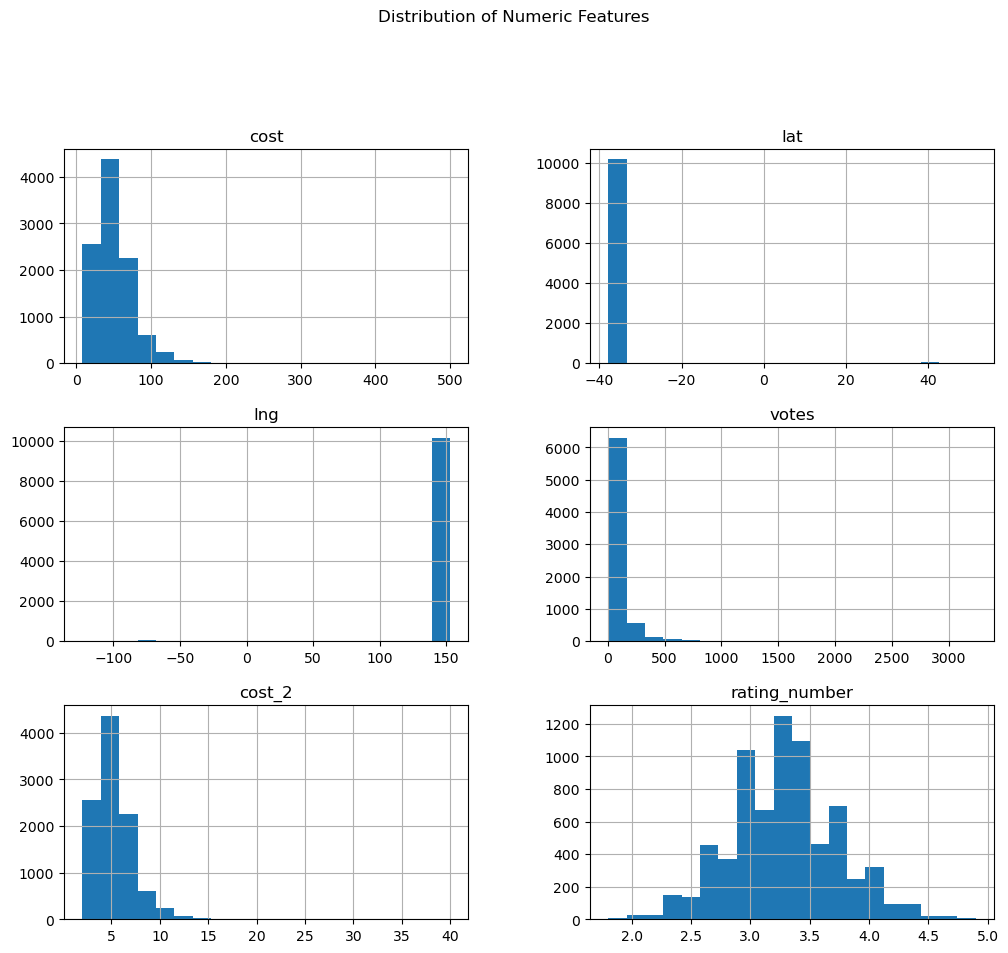

In [56]:
# Define a list of numeric columns from the DataFrame that you want to visualize.
numeric_cols = ['cost', 'lat', 'lng', 'votes', 'cost_2', 'rating_number']  # List of numeric columns

# Generate histograms for the specified numeric columns.
# Each column will have its distribution plotted in a grid of histograms.
# Set the number of bins to 20 for each histogram and specify the figure size for better visibility.
zomato_df[numeric_cols].hist(bins=20, figsize=(12, 10))

# Set the overall title for the plot, adjusting the vertical position slightly above the subplots.
plt.suptitle('Distribution of Numeric Features', y=1.02)

# Display the histograms to visualize the distribution of the numeric features.
plt.show()


I am checking the distribution of all numeric features to gain an understanding of them before applying an imputation method.

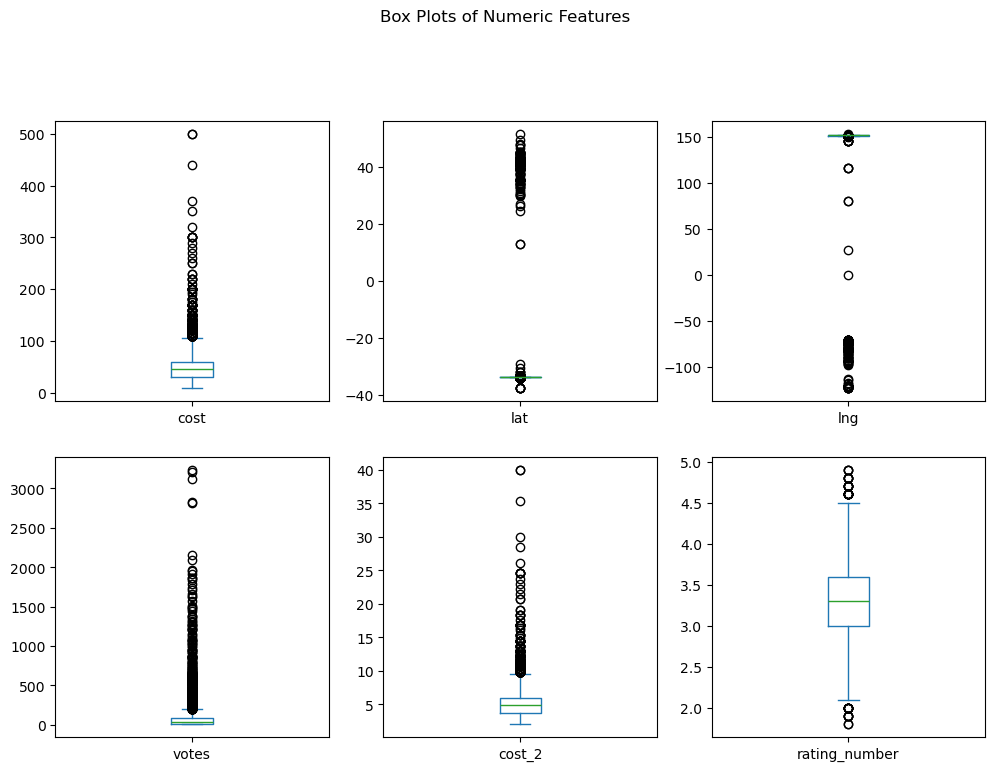

In [57]:
# Create box plots for the specified numeric columns in the DataFrame.
# Each numeric column will have its own subplot, arranged in a 2x3 grid layout.
zomato_df[numeric_cols].plot(kind='box', subplots=True, layout=(2, 3), figsize=(12, 8), sharex=False, sharey=False)

# Set the overall title for the plot, adjusting the vertical position slightly above the subplots for clarity.
plt.suptitle('Box Plots of Numeric Features', y=1.02)

# Display the box plots to visualize the distribution and identify any outliers in the numeric features.
plt.show()


All of these outliers need to remove or using log transformation.

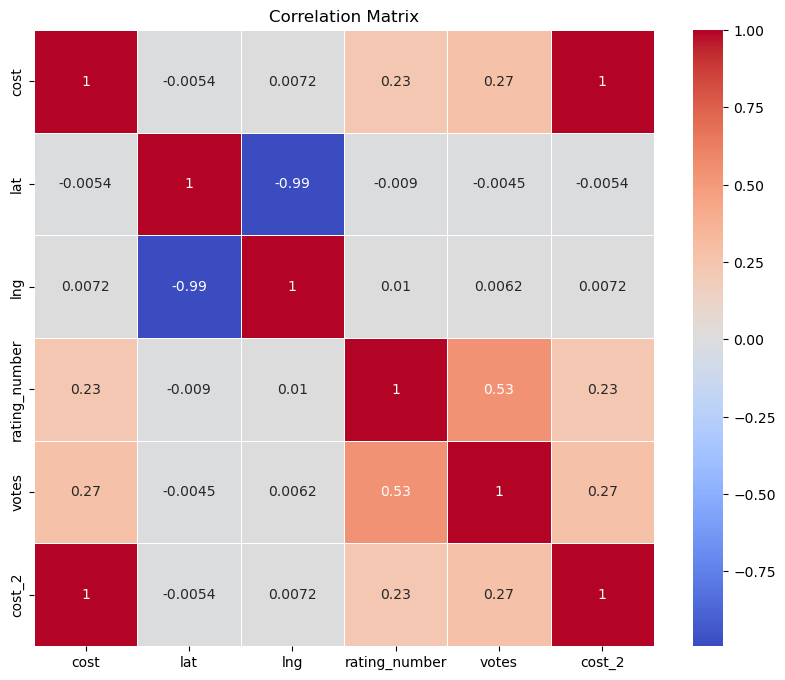

In [58]:
# Select numeric columns from the DataFrame, including both float and integer data types.
numeric_df = zomato_df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for the selected numeric features.
# This matrix shows the pairwise correlation coefficients between the numeric variables.
correlation_matrix = numeric_df.corr()

# Set up the figure size for the heatmap visualization.
plt.figure(figsize=(10, 8))

# Create a heatmap to visualize the correlation matrix using Seaborn.
# Annotate the heatmap with correlation coefficients, apply a 'coolwarm' color palette,
# and set the linewidths for better separation between cells.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Set the title of the heatmap to provide context for the visualization.
plt.title('Correlation Matrix')

# Display the heatmap to visualize the correlations between numeric features.
plt.show()


From this Correlation Matrix I have an idea to select the features that important for my modelling.

## 2. Pre-processing data

In [59]:
# Drop unnessary features and split data into features (x) and target (y)
X = zomato_df.drop(['rating_number', 'address', 'link', 'phone', 'title', 'color', 'cuisine_color', 'cost_2'], axis=1)  # Drop unnessary features
y = zomato_df['rating_number']  # Target variable

In [60]:
# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [61]:
# Check for missing values in X_train
missing_values_X_train = X_train.isna().sum()

# To view only the columns with missing values
missing_values_X_train = missing_values_X_train[missing_values_X_train > 0]
print(f"Missing value in X_train: \n{missing_values_X_train}")


Missing value in X_train: 
cost            272
lat             147
lng             147
rating_text    2643
type             43
votes          2643
dtype: int64


In [62]:
# Check for missing values in y_train
missing_values_y_train = y_train.isna().sum()
print(f"Missing values in y_train: {missing_values_y_train}")


Missing values in y_train: 2643


In [63]:
# Check for missing values in X_test
missing_values_X_test = X_test.isna().sum()

# To view only the columns with missing values
missing_values_X_test = missing_values_X_test[missing_values_X_test > 0]
print(f"missing value in X_test: \n{missing_values_X_test}")

missing value in X_test: 
cost            74
lat             45
lng             45
rating_text    673
type             5
votes          673
dtype: int64


In [64]:
# Check for missing values in y_test
missing_values_y_test = y_test.isna().sum()
print(f"Missing values in y_test: {missing_values_y_test}")

Missing values in y_test: 673


## 2.1 Imputing methods

Using median imputation on Cost and votes features because their distribution is skewed right

In [65]:
# Imputing missing value in X_train
# Imputing missing value in cost and votes by using median
X_train['cost'] = X_train['cost'].fillna(X_train['cost'].median())
X_train['votes'] = X_train['votes'].fillna(X_train['votes'].median())


Using KNN imputation on lat and lng, because it leverages geographical similarity, filling missing values based on the proximity of nearby locations and related features.

In [66]:
# Imputing missing value in X_train
# Imputing missing value in lat and lng by using knn
# Create an imputer object with K neighbors
imputer = KNNImputer(n_neighbors=5)

# Apply the imputation on the relevant columns
X_train[['lat', 'lng']] = imputer.fit_transform(X_train[['lat', 'lng']])

Using mode to impute on rating_text and type, because they are categorical features, and mode (the most frequent value) is the most suitable method to fill missing values for categorical data, ensuring consistency with the majority of the dataset.

In [67]:
# Imputing missing value in X_train
# Imputing missing value in rating_text and type by using mode
X_train['rating_text'] = X_train['rating_text'].fillna(X_train['rating_text'].mode()[0])
X_train['type'] = X_train['type'].fillna(X_train['type'].mode()[0])


Imputing missing value in X_test the same method as X_train

In [68]:
# Imputing missing value in X_train
# Imputing missing value in cost and votes by using median
X_test['cost'] = X_test['cost'].fillna(X_test['cost'].median())
X_test['votes'] = X_test['votes'].fillna(X_test['votes'].median())

# Imputing missing value in X_train
# Imputing missing value in lat and lng by using knn
# Create an imputer object with K neighbors
imputer = KNNImputer(n_neighbors=5)

# Apply the imputation on the relevant columns
X_test[['lat', 'lng']] = imputer.fit_transform(X_test[['lat', 'lng']])

# Imputing missing value in X_train
# Imputing missing value in rating_text and type by using mode
X_test['rating_text'] = X_test['rating_text'].fillna(X_test['rating_text'].mode()[0])
X_test['type'] = X_test['type'].fillna(X_test['type'].mode()[0])

In [69]:
# Checking for missing values in X_train
print("Missing values in X_train:")
print(X_train.isna().sum())
print("\nTotal missing values in X_train:", X_train.isna().sum().sum())

# Checking for missing values in X_test
print("\nMissing values in X_test:")
print(X_test.isna().sum())
print("\nTotal missing values in X_test:", X_test.isna().sum().sum())

# Checking for missing values in y_train
print("\nMissing values in y_train:")
print(y_train.isna().sum())
print("\nTotal missing values in y_train:", y_train.isna().sum())

# Checking for missing values in y_test
print("\nMissing values in y_test:")
print(y_test.isna().sum())
print("\nTotal missing values in y_test:", y_test.isna().sum())


Missing values in X_train:
cost           0
cuisine        0
lat            0
lng            0
rating_text    0
subzone        0
type           0
votes          0
groupon        0
dtype: int64

Total missing values in X_train: 0

Missing values in X_test:
cost           0
cuisine        0
lat            0
lng            0
rating_text    0
subzone        0
type           0
votes          0
groupon        0
dtype: int64

Total missing values in X_test: 0

Missing values in y_train:
2643

Total missing values in y_train: 2643

Missing values in y_test:
673

Total missing values in y_test: 673


Remove missing value in X_train, X_test, y_train and y_test

In [70]:
# Drop rows where y_train has missing values, and remove corresponding rows from X_train
X_train = X_train[~y_train.isna()]
y_train = y_train.dropna()

# Drop rows where y_test has missing values, and remove corresponding rows from X_test
X_test = X_test[~y_test.isna()]
y_test = y_test.dropna()

# Check if missing values have been successfully removed
print("Missing values in y_train after removal:", y_train.isna().sum())
print("Missing values in y_test after removal:", y_test.isna().sum())


Missing values in y_train after removal: 0
Missing values in y_test after removal: 0


Checking only numeric features that have outliers

The reason I did not remove outliers because I notice that as below:

1. **Identifying Outliers in 'Cost' and 'Type'**  
While analyzing the dataset, I noticed a few outliers in the "cost" and "type" columns. "Cost" refers to the price range of the restaurants, and "type" denotes the restaurant category, such as casual or fine dining.

2. **Validating the Presence of Outliers**  
Upon closer review, I found that these outliers are linked to fine dining establishments, which understandably have higher price points compared to casual dining. Given that fine dining plays an important role in the restaurant industry, I believe these outliers reflect real and meaningful data rather than mistakes.

3. **Rationale for Keeping the Outliers**  
These outliers aren't just random deviations, they hold valuable information. If I were to remove them, I would lose critical insights about fine dining restaurants, which are key to understanding the broader range of pricing and restaurant categories.

4. **Effect of Outliers on the Model**  
By keeping these outliers, the model can better capture the diversity of restaurant types and their price ranges. While this might lead to a slight increase in variance, it's necessary for a complete and accurate analysis of both budget and high-end dining establishments.


Number of outliers in each numeric feature:
cost     191
lat      630
lng      455
votes    542
dtype: int64


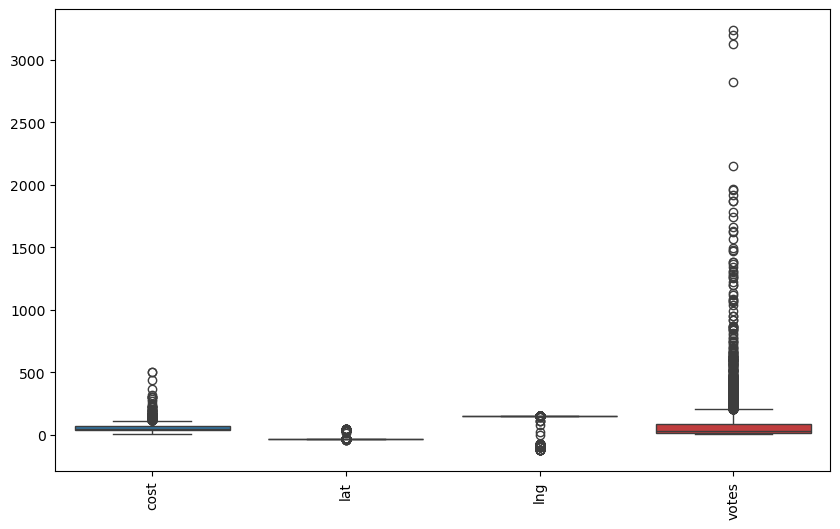

In [71]:
# Select only numeric columns from X_train
X_train_numeric = X_train.select_dtypes(include=['number'])

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = X_train_numeric.quantile(0.25)
Q3 = X_train_numeric.quantile(0.75)
IQR = Q3 - Q1  # Interquartile Range

# Define outlier conditions
outliers_lower_bound = X_train_numeric < (Q1 - 1.5 * IQR)
outliers_upper_bound = X_train_numeric > (Q3 + 1.5 * IQR)

# Combine both lower and upper bounds to mark outliers
outliers = outliers_lower_bound | outliers_upper_bound

# Display the number of outliers in each numeric feature
print("Number of outliers in each numeric feature:")
print(outliers.sum())

# Optional: Visualize outliers using box plots for numeric features
plt.figure(figsize=(10,6))
sns.boxplot(data=X_train_numeric)
plt.xticks(rotation=90)  # Rotate x labels if necessary
plt.show()


Check outliers

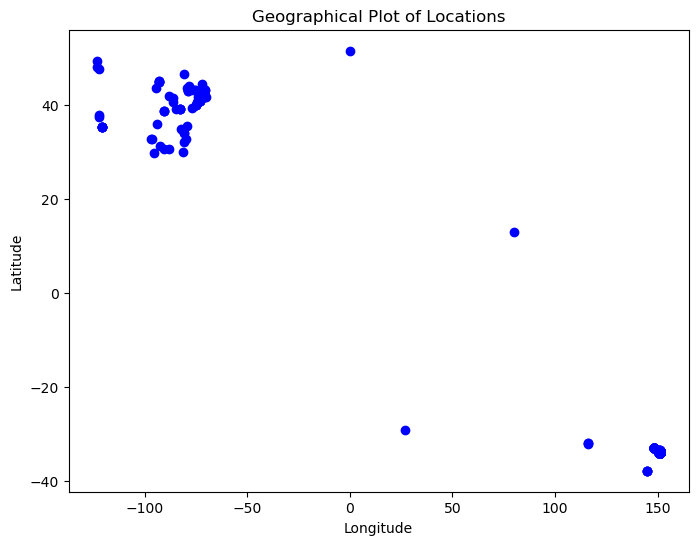

In [72]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train['lng'], X_train['lat'], c='blue', label='Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Plot of Locations')
plt.show()


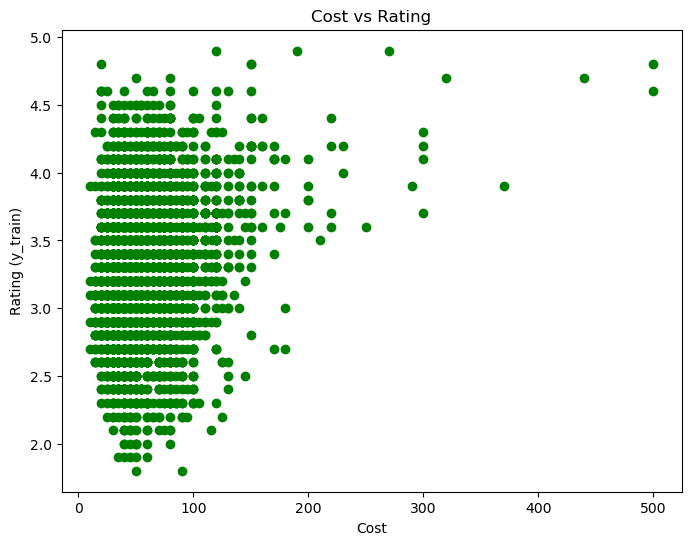

In [73]:
# Example scatter plot to see the relationship between cost and y_train (assuming y_train is continuous)
plt.figure(figsize=(8, 6))
plt.scatter(X_train['cost'], y_train, c='green', label='Cost vs Rating')
plt.xlabel('Cost')
plt.ylabel('Rating (y_train)')
plt.title('Cost vs Rating')
plt.show()


In [74]:
# To check the shape of X_train
print("Shape of X_train:", X_train.shape)

# To check the shape of X_test
print("Shape of X_test:", X_test.shape)


Shape of X_train: (5757, 9)
Shape of X_test: (1427, 9)


## 3. Processing data

One-hot Encoding

In [75]:
# One-Hot Encoding for categorical features
categorical_columns = ['cuisine', 'subzone', 'type', 'groupon', 'rating_text']

# Ensure that One-Hot Encoding is applied before any other transformation
X_train = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

# Align the columns in X_train and X_test (to handle cases where some categories might not be present in the test set)
X_train, X_test = X_train.align(X_test, join='left', axis=1)

# Fill missing columns in X_test (if any) with 0
X_test = X_test.fillna(0)

In [76]:
# To check the shape of X_train
print("Shape of X_train:", X_train.shape)

# To check the shape of X_test
print("Shape of X_test:", X_test.shape)


Shape of X_train: (5757, 1730)
Shape of X_test: (1427, 1730)


Log transformation

In [77]:
# Log Transformation on 'cost' and 'votes' columns (to handle skewed data)
# Adding 1 to avoid log(0) issues
X_train['cost_log'] = np.log1p(X_train['cost'])
X_train['votes_log'] = np.log1p(X_train['votes'])

X_test['cost_log'] = np.log1p(X_test['cost'])
X_test['votes_log'] = np.log1p(X_test['votes'])

Standardize

In [78]:
from sklearn.preprocessing import RobustScaler

# Initialize the RobustScaler
scaler = RobustScaler()

# Scale the numerical columns of X_train and X_test
numeric_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])


Feature Engineering

In [79]:
# Create new interaction and polynomial features for X_train
X_train_interactions = pd.DataFrame({
    'cost_votes_interaction': X_train['cost'] * X_train['votes'],
    'cost_lat_interaction': X_train['cost'] * X_train['lat'],
    'votes_lat_interaction': X_train['votes'] * X_train['lat'],
    'cost_lng_interaction': X_train['cost'] * X_train['lng'],
    'votes_lng_interaction': X_train['votes'] * X_train['lng'],
    'lat_lng_interaction': X_train['lat'] * X_train['lng'],
    'cost_squared': X_train['cost'] ** 2,
    'votes_squared': X_train['votes'] ** 2,
    'lat_squared': X_train['lat'] ** 2,
    'lng_squared': X_train['lng'] ** 2,
    'cost_cubed': X_train['cost'] ** 3,
    'votes_cubed': X_train['votes'] ** 3
})

# Create new interaction and polynomial features for X_test
X_test_interactions = pd.DataFrame({
    'cost_votes_interaction': X_test['cost'] * X_test['votes'],
    'cost_lat_interaction': X_test['cost'] * X_test['lat'],
    'votes_lat_interaction': X_test['votes'] * X_test['lat'],
    'cost_lng_interaction': X_test['cost'] * X_test['lng'],
    'votes_lng_interaction': X_test['votes'] * X_test['lng'],
    'lat_lng_interaction': X_test['lat'] * X_test['lng'],
    'cost_squared': X_test['cost'] ** 2,
    'votes_squared': X_test['votes'] ** 2,
    'lat_squared': X_test['lat'] ** 2,
    'lng_squared': X_test['lng'] ** 2,
    'cost_cubed': X_test['cost'] ** 3,
    'votes_cubed': X_test['votes'] ** 3
})

# Concatenate the new features with the original DataFrames
X_train = pd.concat([X_train.reset_index(drop=True), X_train_interactions.reset_index(drop=True)], axis=1)
X_test = pd.concat([X_test.reset_index(drop=True), X_test_interactions.reset_index(drop=True)], axis=1)



PCA

In [80]:
# Apply PCA for dimensionality reduction (after scaling)
pca = PCA(n_components=255)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Check explained variance ratio to understand how much variance is retained
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by first 10 components: {explained_variance[:10]}")
# print(f"Explained variance by each component: {explained_variance}")
print(f"Total variance explained by {pca.n_components_} components: {sum(explained_variance)}")

Explained variance by first 10 components: [9.96003021e-01 3.94459400e-03 3.91018738e-05 1.28033122e-05
 3.36445721e-07 1.17574502e-07 2.16006943e-08 1.91352226e-09
 8.48727626e-10 6.11974668e-10]
Total variance explained by 255 components: 0.9999999999979498


## 4. Building the model

4.1. Building the model 1

In [81]:
# Train the Model using PCA-transformed data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## 5. Evaluate the model

In [82]:
# Evaluate the Model
y_pred = model.predict(X_test)

# Calculate R² and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Report R² and MSE
print(f'Test Set R² score: {r2}')
print(f'Test Set MSE: {mse}')


Test Set R² score: 0.8471694059655929
Test Set MSE: 0.029181937501919004


# MODEL TWO: Gradient Descent

In [83]:
# Import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import SGDRegressor

## 1. Importing data

In [84]:
# Load the zomato_df_final_data.csv dataset
zomato_df = pd.read_csv('../data/zomato_df_final_data.csv')

## 2. Pre-processing data

In [85]:
# Drop unnessary features and split data into features (x) and target (y)
X = zomato_df.drop(['rating_number', 'address', 'link', 'phone', 'title', 'color', 'cuisine_color', 'cost_2'], axis=1)  # Drop unnessary features
y = zomato_df['rating_number']  # Target variable

In [86]:
# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 2.1 Imputing numberic features with median and mode in traing and testing set

In [87]:
# Impute numeric features with median
X_train['cost'] = X_train['cost'].fillna(X_train['cost'].median())
X_train['lat'] = X_train['lat'].fillna(X_train['lat'].median())
X_train['lng'] = X_train['lng'].fillna(X_train['lng'].median())

# Impute categorical features with mode
X_train['type'] = X_train['type'].fillna(X_train['type'].mode()[0])


In [88]:
# Apply the same imputation logic to the test set using the training set statistics
X_test['cost'] = X_test['cost'].fillna(X_train['cost'].median())
X_test['lat'] = X_test['lat'].fillna(X_train['lat'].median())
X_test['lng'] = X_test['lng'].fillna(X_train['lng'].median())
X_test['type'] = X_test['type'].fillna(X_train['type'].mode()[0])

I did this step differently from Model One: Linear Regress, because I get good result on the Evaluate my model

In [89]:
# Drop rows where y_train has missing values, and remove corresponding rows from X_train
X_train = X_train[~y_train.isna()]
y_train = y_train.dropna()

# Drop rows where y_test has missing values, and remove corresponding rows from X_test
X_test = X_test[~y_test.isna()]
y_test = y_test.dropna()


## 3. Processing

### 3.1. One-Hot Encoding

In [90]:
# One-Hot Encoding on Categorical Features for training data
categorical_columns = ['cuisine', 'subzone', 'type', 'rating_text']
X_train = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)

# Apply the same One-Hot Encoding to the test data
X_test = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

# Align the test set columns with the training set (in case some categories are missing in the test set)
X_train, X_test = X_train.align(X_test, join='left', axis=1)
X_test = X_test.fillna(0)  # Fill any missing columns in the test set with 0

### 3.2. Standardize

In [91]:
# Scaling numeric features for training data
numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns  # Select numeric features only
scaler = StandardScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])

# Apply the same scaling to the test data
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])


### 3.3 Cross-validation using Kfold

In [92]:
# Define the model
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=0)

# Perform Cross-Validation using KFold on training data
kf = KFold(n_splits=5, shuffle=True, random_state=0)
cv_r2_scores = cross_val_score(sgd_model, X_train, y_train, cv=kf, scoring='r2')
cv_mse_scores = cross_val_score(sgd_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

# Output the results
print("Cross-Validation R2 Scores:", cv_r2_scores)
print("Cross-Validation MSE Scores:", cv_mse_scores)


Cross-Validation R2 Scores: [0.74014605 0.75555717 0.76338239 0.759141   0.75470435]
Cross-Validation MSE Scores: [-0.05425191 -0.05279609 -0.04873388 -0.05115819 -0.05100524]


## 4. Building the model

In [93]:
# Train the model using SGDRegressor with tuned hyperparameters
sgd_model = SGDRegressor(
    max_iter=1000,                # Increase max iterations to allow more time for convergence
    tol=1e-4,                     # Decrease tolerance for better convergence
    learning_rate='adaptive',     # Use an adaptive learning rate
    eta0=0.005,                   # Tune the learning rate to a lower value
    penalty='elasticnet',         # Use ElasticNet regularization (combines L1 and L2)
    l1_ratio=0.5,                 # Ratio of L1 and L2 penalties for ElasticNet
    random_state=0
)

# Fit the model to the training data
sgd_model.fit(X_train, y_train)

# Calculate Cross-Validation Results
mean_cv_r2 = np.mean(cv_r2_scores)
mean_cv_mse = -np.mean(cv_mse_scores)  # MSE is returned as negative, so negate it

## 5. Evaluate the model

In [94]:
# Evaluate the Model on the Test Set
y_pred = sgd_model.predict(X_test)

# Calculate R² and MSE for the Test Set
r2_test = r2_score(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)

# Print the results
print(f'Cross-validated R² score: {mean_cv_r2}')
print(f'Cross-validated MSE: {mean_cv_mse}')
print(f'Test Set R² score: {r2_test}')
print(f'Test Set MSE: {mse_test}')

Cross-validated R² score: 0.7545861915650928
Cross-validated MSE: 0.05158906052149518
Test Set R² score: 0.7682581858137427
Test Set MSE: 0.04424948539192481


# MODEL THREE: Logistic Regression

## 1. Loading Data

In [95]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler  
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the zomato_df_final_data.csv dataset
zomato_df = pd.read_csv('../data/zomato_df_final_data.csv')


## 2. Pre-processing

In [96]:
# Simplify the target variable 'rating_text' into two classes
# Class 1: 'Poor' and 'Average'
# Class 2: 'Good', 'Very Good', 'Excellent'
zomato_df['rating_class'] = zomato_df['rating_text'].apply(lambda x: 1 if x in ['Poor', 'Average'] else 2)

# Drop unnecessary features and split data into features (X) and target (y)
X = zomato_df.drop(['rating_number', 'address', 'link', 'phone', 'title', 'color', 'cuisine_color', 'cost_2', 'rating_class', 'rating_text'], axis=1)
y = zomato_df['rating_class']  # Binary classification target variable

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Impute missing values and handle categorical variables
X_train['cost'] = X_train['cost'].fillna(X_train['cost'].median())
X_train['votes'] = X_train['votes'].fillna(X_train['votes'].median())

imputer = KNNImputer(n_neighbors=5)
X_train[['lat', 'lng']] = imputer.fit_transform(X_train[['lat', 'lng']])
X_train['type'] = X_train['type'].fillna(X_train['type'].mode()[0])

# Do the same for X_test
X_test['cost'] = X_test['cost'].fillna(X_test['cost'].median())
X_test['votes'] = X_test['votes'].fillna(X_test['votes'].median())
X_test[['lat', 'lng']] = imputer.fit_transform(X_test[['lat', 'lng']])
X_test['type'] = X_test['type'].fillna(X_test['type'].mode()[0])

# One-Hot Encoding for categorical features
categorical_columns = ['cuisine', 'subzone', 'type', 'groupon']
X_train = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

# Align the columns in X_train and X_test
X_train, X_test = X_train.align(X_test, join='left', axis=1)
X_test = X_test.fillna(0)

# Log Transformation on 'cost' and 'votes'
X_train['cost_log'] = np.log1p(X_train['cost'])
X_train['votes_log'] = np.log1p(X_train['votes'])
X_test['cost_log'] = np.log1p(X_test['cost'])
X_test['votes_log'] = np.log1p(X_test['votes'])


## 3. Processing

In [97]:
# Initialize and apply RobustScaler for scaling
scaler = RobustScaler()
numeric_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])


## 4. Building the model

In [98]:
# Build Logistic Regression model for the simplified binary classification
model_classification_3 = LogisticRegression(max_iter=1000, solver='lbfgs', C=0.5)

# Train the logistic regression model
model_classification_3.fit(X_train, y_train)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.5, max_iter=1000)

## 5. Evaluate the model

Accuracy: 0.7861904761904762
Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.71      0.75       958
           2       0.78      0.85      0.81      1142

    accuracy                           0.79      2100
   macro avg       0.79      0.78      0.78      2100
weighted avg       0.79      0.79      0.78      2100



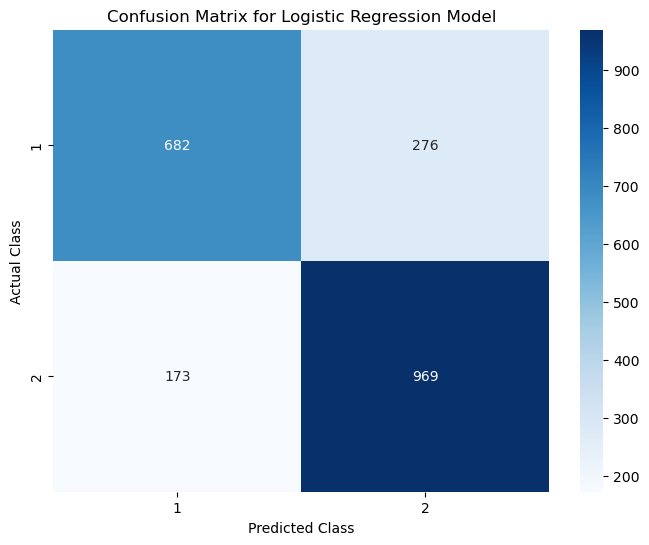

Confusion Matrix:
[[682 276]
 [173 969]]


In [99]:
# Make predictions
y_pred = model_classification_3.predict(X_test)

# Evaluate the logistic regression model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_rep}")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2], yticklabels=[1, 2])
plt.title('Confusion Matrix for Logistic Regression Model')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

# Print the confusion matrix values
print("Confusion Matrix:")
print(conf_matrix)


# My Other MODEL ONE with Decision Tree

In [101]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeRegressor  # Import Decision Tree Regressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.decomposition import PCA

# Load the zomato_df_final_data.csv dataset
zomato_df = pd.read_csv('../data/zomato_df_final_data.csv')

# Drop unnecessary features and split data into features (X) and target (y)
X = zomato_df.drop(['rating_number', 'address', 'link', 'phone', 'title', 'color', 'cuisine_color', 'cost_2'], axis=1)
y = zomato_df['rating_number']  # Target variable

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Imputing missing value in X_train
X_train['cost'] = X_train['cost'].fillna(X_train['cost'].median())
X_train['votes'] = X_train['votes'].fillna(X_train['votes'].median())
imputer = KNNImputer(n_neighbors=5)
X_train[['lat', 'lng']] = imputer.fit_transform(X_train[['lat', 'lng']])
X_train['rating_text'] = X_train['rating_text'].fillna(X_train['rating_text'].mode()[0])
X_train['type'] = X_train['type'].fillna(X_train['type'].mode()[0])

# Do the same for X_test
X_test['cost'] = X_test['cost'].fillna(X_test['cost'].median())
X_test['votes'] = X_test['votes'].fillna(X_test['votes'].median())
X_test[['lat', 'lng']] = imputer.fit_transform(X_test[['lat', 'lng']])
X_test['rating_text'] = X_test['rating_text'].fillna(X_test['rating_text'].mode()[0])
X_test['type'] = X_test['type'].fillna(X_test['type'].mode()[0])

# Drop rows where y_train and y_test have missing values
X_train = X_train[~y_train.isna()]
y_train = y_train.dropna()
X_test = X_test[~y_test.isna()]
y_test = y_test.dropna()

# One-Hot Encoding for categorical features
categorical_columns = ['cuisine', 'subzone', 'type', 'groupon', 'rating_text']
X_train = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

# Align the columns in X_train and X_test
X_train, X_test = X_train.align(X_test, join='left', axis=1)
X_test = X_test.fillna(0)

# Log Transformation on 'cost' and 'votes' columns
X_train['cost_log'] = np.log1p(X_train['cost'])
X_train['votes_log'] = np.log1p(X_train['votes'])
X_test['cost_log'] = np.log1p(X_test['cost'])
X_test['votes_log'] = np.log1p(X_test['votes'])

# Initialize the RobustScaler
scaler = RobustScaler()

# Scale the numerical columns of X_train and X_test
numeric_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

# Create new interaction and polynomial features for X_train and X_test
X_train_interactions = pd.DataFrame({
    'cost_votes_interaction': X_train['cost'] * X_train['votes'],
    'cost_lat_interaction': X_train['cost'] * X_train['lat'],
    'votes_lat_interaction': X_train['votes'] * X_train['lat'],
    'cost_lng_interaction': X_train['cost'] * X_train['lng'],
    'votes_lng_interaction': X_train['votes'] * X_train['lng'],
    'lat_lng_interaction': X_train['lat'] * X_train['lng'],
    'cost_squared': X_train['cost'] ** 2,
    'votes_squared': X_train['votes'] ** 2,
    'lat_squared': X_train['lat'] ** 2,
    'lng_squared': X_train['lng'] ** 2,
    'cost_cubed': X_train['cost'] ** 3,
    'votes_cubed': X_train['votes'] ** 3
})

X_test_interactions = pd.DataFrame({
    'cost_votes_interaction': X_test['cost'] * X_test['votes'],
    'cost_lat_interaction': X_test['cost'] * X_test['lat'],
    'votes_lat_interaction': X_test['votes'] * X_test['lat'],
    'cost_lng_interaction': X_test['cost'] * X_test['lng'],
    'votes_lng_interaction': X_test['votes'] * X_test['lng'],
    'lat_lng_interaction': X_test['lat'] * X_test['lng'],
    'cost_squared': X_test['cost'] ** 2,
    'votes_squared': X_test['votes'] ** 2,
    'lat_squared': X_test['lat'] ** 2,
    'lng_squared': X_test['lng'] ** 2,
    'cost_cubed': X_test['cost'] ** 3,
    'votes_cubed': X_test['votes'] ** 3
})

# Concatenate the new features with the original DataFrames
X_train = pd.concat([X_train.reset_index(drop=True), X_train_interactions.reset_index(drop=True)], axis=1)
X_test = pd.concat([X_test.reset_index(drop=True), X_test_interactions.reset_index(drop=True)], axis=1)

# Apply PCA for dimensionality reduction (after scaling)
pca = PCA(n_components=255)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Check explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by first 10 components: {explained_variance[:10]}")
print(f"Total variance explained by {pca.n_components_} components: {sum(explained_variance)}")

# Train the Decision Tree Model
decision_tree_model = DecisionTreeRegressor(random_state=0)
decision_tree_model.fit(X_train, y_train)

# Evaluate the Model
y_pred = decision_tree_model.predict(X_test)

# Calculate R² and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Report R² and MSE
print(f'Test Set R² score: {r2}')
print(f'Test Set MSE: {mse}')


Explained variance by first 10 components: [9.96003021e-01 3.94459400e-03 3.91018738e-05 1.28033122e-05
 3.36445721e-07 1.17574502e-07 2.16006943e-08 1.91352226e-09
 8.48727626e-10 6.11974668e-10]
Total variance explained by 255 components: 0.9999999999979499
Test Set R² score: 0.6992392473652012
Test Set MSE: 0.0574281709880869


# My Other MODEL TWO with Random forest

In [102]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor  # Import Random Forest Regressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.decomposition import PCA

# Load the zomato_df_final_data.csv dataset
zomato_df = pd.read_csv('../data/zomato_df_final_data.csv')

# Drop unnecessary features and split data into features (X) and target (y)
X = zomato_df.drop(['rating_number', 'address', 'link', 'phone', 'title', 'color', 'cuisine_color', 'cost_2'], axis=1)
y = zomato_df['rating_number']  # Target variable

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Imputing missing value in X_train
X_train['cost'] = X_train['cost'].fillna(X_train['cost'].median())
X_train['votes'] = X_train['votes'].fillna(X_train['votes'].median())
imputer = KNNImputer(n_neighbors=5)
X_train[['lat', 'lng']] = imputer.fit_transform(X_train[['lat', 'lng']])
X_train['rating_text'] = X_train['rating_text'].fillna(X_train['rating_text'].mode()[0])
X_train['type'] = X_train['type'].fillna(X_train['type'].mode()[0])

# Do the same for X_test
X_test['cost'] = X_test['cost'].fillna(X_test['cost'].median())
X_test['votes'] = X_test['votes'].fillna(X_test['votes'].median())
X_test[['lat', 'lng']] = imputer.fit_transform(X_test[['lat', 'lng']])
X_test['rating_text'] = X_test['rating_text'].fillna(X_test['rating_text'].mode()[0])
X_test['type'] = X_test['type'].fillna(X_test['type'].mode()[0])

# Drop rows where y_train and y_test have missing values
X_train = X_train[~y_train.isna()]
y_train = y_train.dropna()
X_test = X_test[~y_test.isna()]
y_test = y_test.dropna()

# One-Hot Encoding for categorical features
categorical_columns = ['cuisine', 'subzone', 'type', 'groupon', 'rating_text']
X_train = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

# Align the columns in X_train and X_test
X_train, X_test = X_train.align(X_test, join='left', axis=1)
X_test = X_test.fillna(0)

# Log Transformation on 'cost' and 'votes' columns
X_train['cost_log'] = np.log1p(X_train['cost'])
X_train['votes_log'] = np.log1p(X_train['votes'])
X_test['cost_log'] = np.log1p(X_test['cost'])
X_test['votes_log'] = np.log1p(X_test['votes'])

# Initialize the RobustScaler
scaler = RobustScaler()

# Scale the numerical columns of X_train and X_test
numeric_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

# Create new interaction and polynomial features for X_train and X_test
X_train_interactions = pd.DataFrame({
    'cost_votes_interaction': X_train['cost'] * X_train['votes'],
    'cost_lat_interaction': X_train['cost'] * X_train['lat'],
    'votes_lat_interaction': X_train['votes'] * X_train['lat'],
    'cost_lng_interaction': X_train['cost'] * X_train['lng'],
    'votes_lng_interaction': X_train['votes'] * X_train['lng'],
    'lat_lng_interaction': X_train['lat'] * X_train['lng'],
    'cost_squared': X_train['cost'] ** 2,
    'votes_squared': X_train['votes'] ** 2,
    'lat_squared': X_train['lat'] ** 2,
    'lng_squared': X_train['lng'] ** 2,
    'cost_cubed': X_train['cost'] ** 3,
    'votes_cubed': X_train['votes'] ** 3
})

X_test_interactions = pd.DataFrame({
    'cost_votes_interaction': X_test['cost'] * X_test['votes'],
    'cost_lat_interaction': X_test['cost'] * X_test['lat'],
    'votes_lat_interaction': X_test['votes'] * X_test['lat'],
    'cost_lng_interaction': X_test['cost'] * X_test['lng'],
    'votes_lng_interaction': X_test['votes'] * X_test['lng'],
    'lat_lng_interaction': X_test['lat'] * X_test['lng'],
    'cost_squared': X_test['cost'] ** 2,
    'votes_squared': X_test['votes'] ** 2,
    'lat_squared': X_test['lat'] ** 2,
    'lng_squared': X_test['lng'] ** 2,
    'cost_cubed': X_test['cost'] ** 3,
    'votes_cubed': X_test['votes'] ** 3
})

# Concatenate the new features with the original DataFrames
X_train = pd.concat([X_train.reset_index(drop=True), X_train_interactions.reset_index(drop=True)], axis=1)
X_test = pd.concat([X_test.reset_index(drop=True), X_test_interactions.reset_index(drop=True)], axis=1)

# Apply PCA for dimensionality reduction (after scaling)
pca = PCA(n_components=255)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Check explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by first 10 components: {explained_variance[:10]}")
print(f"Total variance explained by {pca.n_components_} components: {sum(explained_variance)}")

# Train the Random Forest Model
random_forest_model = RandomForestRegressor(random_state=0)
random_forest_model.fit(X_train, y_train)

# Evaluate the Model
y_pred = random_forest_model.predict(X_test)

# Calculate R² and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Report R² and MSE
print(f'Test Set R² score: {r2}')
print(f'Test Set MSE: {mse}')


Explained variance by first 10 components: [9.96003021e-01 3.94459400e-03 3.91018738e-05 1.28033122e-05
 3.36445721e-07 1.17574502e-07 2.16006943e-08 1.91352226e-09
 8.48727626e-10 6.11974668e-10]
Total variance explained by 255 components: 0.9999999999979489
Test Set R² score: 0.8460674355061036
Test Set MSE: 0.02939235108619479


# My other MODEL THREE with Neural Network


Training model 1 with architecture: (10,)
Iteration 1, loss = 2.06305955
Validation score: 0.553741
Iteration 2, loss = 2.62340227
Validation score: 0.646259
Iteration 3, loss = 1.94289341
Validation score: 0.648980
Iteration 4, loss = 0.96413234
Validation score: 0.677551
Iteration 5, loss = 0.93531818
Validation score: 0.674830
Iteration 6, loss = 0.84522737
Validation score: 0.719728
Iteration 7, loss = 0.93148714
Validation score: 0.706122
Iteration 8, loss = 0.86882276
Validation score: 0.556463
Iteration 9, loss = 1.06096454
Validation score: 0.612245
Iteration 10, loss = 0.84587265
Validation score: 0.697959
Iteration 11, loss = 1.17436407
Validation score: 0.567347
Iteration 12, loss = 0.80763126
Validation score: 0.557823
Iteration 13, loss = 0.72058071
Validation score: 0.555102
Iteration 14, loss = 0.70031990
Validation score: 0.555102
Iteration 15, loss = 0.69418587
Validation score: 0.555102
Iteration 16, loss = 0.69195147
Validation score: 0.444898
Iteration 17, loss = 0

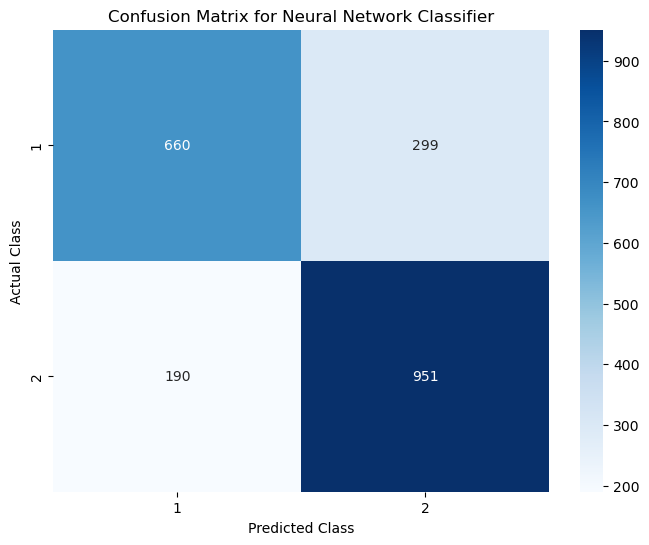

In [103]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.neural_network import MLPClassifier  # Import MLPClassifier for classification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the zomato_df_final_data.csv dataset
zomato_df = pd.read_csv('../data/zomato_df_final_data.csv')

# Simplify the target variable 'rating_text' into two classes
zomato_df['rating_class'] = zomato_df['rating_text'].apply(lambda x: 1 if x in ['Poor', 'Average'] else 2)

# Drop unnecessary features and split data into features (X) and target (y)
X = zomato_df.drop(['rating_number', 'address', 'link', 'phone', 'title', 'color', 'cuisine_color', 'cost_2', 'rating_class', 'rating_text'], axis=1)
y = zomato_df['rating_class']  # Binary classification target variable

# Split the data into 70% training, 10% validation, and 20% testing
X_train_validate, X_test, y_train_validate, y_test = train_test_split(X, y, test_size=0.2, random_state=33)
X_train, X_val, y_train, y_val = train_test_split(X_train_validate, y_train_validate, test_size=0.125, random_state=33)

# Impute missing values and handle categorical variables
X_train['cost'] = X_train['cost'].fillna(X_train['cost'].median())
X_train['votes'] = X_train['votes'].fillna(X_train['votes'].median())
imputer = KNNImputer(n_neighbors=5)
X_train[['lat', 'lng']] = imputer.fit_transform(X_train[['lat', 'lng']])
X_train['type'] = X_train['type'].fillna(X_train['type'].mode()[0])

# Do the same for X_test and X_val
X_test['cost'] = X_test['cost'].fillna(X_test['cost'].median())
X_test['votes'] = X_test['votes'].fillna(X_test['votes'].median())
X_test[['lat', 'lng']] = imputer.fit_transform(X_test[['lat', 'lng']])
X_test['type'] = X_test['type'].fillna(X_test['type'].mode()[0])

X_val['cost'] = X_val['cost'].fillna(X_val['cost'].median())
X_val['votes'] = X_val['votes'].fillna(X_val['votes'].median())
X_val[['lat', 'lng']] = imputer.fit_transform(X_val[['lat', 'lng']])
X_val['type'] = X_val['type'].fillna(X_val['type'].mode()[0])

# One-Hot Encoding for categorical features
categorical_columns = ['cuisine', 'subzone', 'type', 'groupon']
X_train = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)
X_val = pd.get_dummies(X_val, columns=categorical_columns, drop_first=True)

# Align the columns in X_train, X_val, and X_test
X_train, X_test = X_train.align(X_test, join='left', axis=1)
X_test = X_test.fillna(0)
X_train, X_val = X_train.align(X_val, join='left', axis=1)
X_val = X_val.fillna(0)

# Log Transformation on 'cost' and 'votes'
X_train['cost_log'] = np.log1p(X_train['cost'])
X_train['votes_log'] = np.log1p(X_train['votes'])
X_test['cost_log'] = np.log1p(X_test['cost'])
X_test['votes_log'] = np.log1p(X_test['votes'])
X_val['cost_log'] = np.log1p(X_val['cost'])
X_val['votes_log'] = np.log1p(X_val['votes'])

# Standardize the features using StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# List of different architectures and hyperparameters to try
architectures = [
    {'hidden_layer_sizes': (10,), 'learning_rate_init': 0.1, 'batch_size': 16},
    {'hidden_layer_sizes': (50,), 'learning_rate_init': 0.1, 'batch_size': 32},
    {'hidden_layer_sizes': (100,), 'learning_rate_init': 0.01, 'batch_size': 64},
    {'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.01, 'batch_size': 128},
    {'hidden_layer_sizes': (100, 50), 'learning_rate_init': 0.001, 'batch_size': 256},
    {'hidden_layer_sizes': (100, 100), 'learning_rate_init': 0.001, 'batch_size': 512},
    {'hidden_layer_sizes': (150, 100), 'learning_rate_init': 0.01, 'batch_size': 128},
    {'hidden_layer_sizes': (200, 100), 'learning_rate_init': 0.001, 'batch_size': 64},
    {'hidden_layer_sizes': (200, 150), 'learning_rate_init': 0.0001, 'batch_size': 32},
    {'hidden_layer_sizes': (100, 100, 100), 'learning_rate_init': 0.1, 'batch_size': 16}
]

# Initialize lists to store results
training_accuracy_list = []
validation_accuracy_list = []
test_accuracy_list = []
models = []

# Loop through each architecture and train the model
for i, arch in enumerate(architectures):
    print(f"\nTraining model {i+1} with architecture: {arch['hidden_layer_sizes']}")

    # Create the MLPClassifier with the specified architecture and parameters
    mlp_classifier = MLPClassifier(activation='relu',
                                   hidden_layer_sizes=arch['hidden_layer_sizes'], 
                                   learning_rate_init=arch['learning_rate_init'], 
                                   batch_size=arch['batch_size'], 
                                   early_stopping=True,
                                   validation_fraction=0.1, 
                                   alpha=0.01,
                                   max_iter=1000, 
                                   verbose=True)

    # Train the model
    mlp_classifier.fit(X_train_scaled, y_train)

    # Evaluate on training data
    train_accuracy = accuracy_score(y_train, mlp_classifier.predict(X_train_scaled))
    training_accuracy_list.append(train_accuracy)

    # Evaluate on validation data
    val_accuracy = accuracy_score(y_val, mlp_classifier.predict(X_val_scaled))
    validation_accuracy_list.append(val_accuracy)

    # Evaluate on test data
    test_accuracy = accuracy_score(y_test, mlp_classifier.predict(X_test_scaled))
    test_accuracy_list.append(test_accuracy)

# Print the results for each model
print("\nTraining Accuracy:", training_accuracy_list)
print("Validation Accuracy:", validation_accuracy_list)
print("Test Accuracy:", test_accuracy_list)

# For best model, you can also print confusion matrix and classification report
best_model_idx = np.argmax(validation_accuracy_list)
best_model = architectures[best_model_idx]
print(f"\nBest Model Architecture: {best_model['hidden_layer_sizes']}")
best_mlp_classifier = MLPClassifier(activation='relu',
                                    hidden_layer_sizes=best_model['hidden_layer_sizes'], 
                                    learning_rate_init=best_model['learning_rate_init'], 
                                    batch_size=best_model['batch_size'], 
                                    early_stopping=True,
                                    validation_fraction=0.1, 
                                    alpha=0.01,
                                    max_iter=1000)
best_mlp_classifier.fit(X_train_scaled, y_train)

# Generate confusion matrix and classification report
y_pred = best_mlp_classifier.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2], yticklabels=[1, 2])
plt.title('Confusion Matrix for Neural Network Classifier')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()
